In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**8. Fit some of the non-linear models investigated in this chapter to the
Auto data set. Is there evidence for non-linear relationships in this
data set? Create some informative plots to justify your answer.**

In [3]:
Auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


定性变量与wage分布关系来看，已婚的高于未婚收入，亚洲血统收入更高，教育程度越高收入越高，信息行业高于工业收入，健康程度越好收入越高

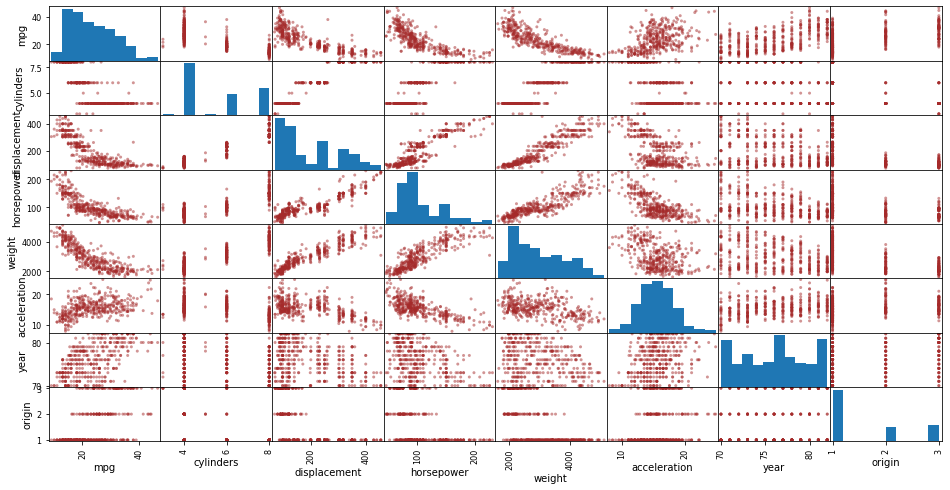

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(Auto, color="brown",figsize=(16,8))
plt.grid(linestyle='')

从散点图形上看所有特征变量与响应均有明显关系

In [5]:
Auto.corr()['mpg'].sort_values(ascending=False)

mpg             1.000000
year            0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

In [6]:
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly

**使用anova方案得到每个变量关系**

In [7]:
#定义一个比较拟合单个幂次的函数
def anova_degree_10(data,X_column,y_column):
    fit = []
    for degree in range(1,11):
        fit.append(smf.ols('{} ~ {}'.format(y_column,patsy_model_poly(X_column,degree)),data = data).fit())
    print(sm.stats.anova_lm(fit[0],fit[1], fit[2], fit[3],fit[4],fit[5],fit[6],fit[7],fit[8],fit[9],fit[0], typ=1))

In [8]:
anova_degree_10(Auto,'cylinders','mpg')

    df_resid          ssr  df_diff       ss_diff          F        Pr(>F)
0      390.0  9415.910391      0.0           NaN        NaN           NaN
1      389.0  9350.088340      1.0  6.582205e+01   2.726300  9.951473e-02
2      388.0  8544.703484      1.0  8.053849e+02  33.358441  1.573199e-08
3      387.0  8544.486702      1.0  2.167819e-01   0.008979  9.245566e-01
4      387.0  8544.486702     -0.0 -0.000000e+00        NaN           NaN
5      387.0  8544.486702     -0.0 -1.818989e-12        inf           NaN
6      387.0  8544.486702     -0.0  1.818989e-12       -inf           NaN
7      387.0  8544.486702     -0.0 -1.818989e-12        inf           NaN
8      387.0  8544.486702     -0.0 -3.637979e-12        inf           NaN
9      387.0  8544.486702     -0.0 -0.000000e+00        NaN           NaN
10     390.0  9415.910391     -3.0 -8.714237e+02  12.031240           NaN


c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


与'cylinders'线性相关

In [9]:
anova_degree_10(Auto,'displacement','mpg')

    df_resid            ssr  df_diff        ss_diff            F        Pr(>F)
0      390.0    8378.821617      0.0            NaN          NaN           NaN
1      389.0    7412.262749      1.0     966.558868    44.989376  7.002576e-11
2      388.0    7392.322006      1.0      19.940743     0.928160  3.359415e-01
3      387.0    7391.721827      1.0       0.600179     0.027936  8.673469e-01
4      386.0    7380.837637      1.0      10.884189     0.506615  4.770380e-01
5      386.0    7304.417427     -0.0      76.420210         -inf           NaN
6      387.0   25538.623445     -1.0  -18234.206017   848.727980           NaN
7      387.0   54925.121335     -0.0  -29386.497890          inf           NaN
8      387.0   99171.074840     -0.0  -44245.953505          inf           NaN
9      387.0  141998.456107     -0.0  -42827.381266          inf           NaN
10     390.0    8378.821617     -3.0  133619.634490 -2073.149815           NaN


与'displacement'二次相关

In [10]:
anova_degree_10(Auto,'horsepower','mpg')

    df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0      390.0   9385.915872      0.0           NaN         NaN           NaN
1      389.0   7442.029412      1.0   1943.886460   80.771630  1.114354e-17
2      388.0   7426.436007      1.0     15.593405    0.647931  4.213463e-01
3      387.0   7399.522632      1.0     26.913375    1.118294  2.909457e-01
4      386.0   7223.371686      1.0    176.150946    7.319357  7.123921e-03
5      386.0   7246.195757     -0.0    -22.824071         inf           NaN
6      386.0   7241.387753     -0.0      4.808003        -inf           NaN
7      386.0   8594.593999     -0.0  -1353.206246         inf           NaN
8      386.0  13700.124567     -0.0  -5105.530569         inf           NaN
9      387.0  25084.060566     -1.0 -11383.935998  473.020971           NaN
10     390.0   9385.915872     -3.0  15698.144694 -217.427776           NaN


与'horsepower'二次相关

In [11]:
anova_degree_10(Auto,'weight','mpg')

    df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0      390.0  7321.233706      0.0         NaN        NaN           NaN
1      389.0  6784.898509      1.0  536.335198  28.570421  1.542991e-07
2      388.0  6784.849925      1.0    0.048584   0.002588  9.594531e-01
3      388.0  6792.899897     -0.0   -8.049972        inf           NaN
4      388.0  7301.805242     -0.0 -508.905344        inf           NaN
5      387.0  7284.712281      1.0   17.092961   0.910537  3.405676e-01
6      386.0  7277.542115      1.0    7.170166   0.381953  5.369245e-01
7      385.0  7246.464640      1.0   31.077475   1.655488  1.989867e-01
8      384.0  7243.150803      1.0    3.313837   0.176527  6.746099e-01
9      383.0  7192.766636      1.0   50.384167   2.683950  1.021852e-01
10     390.0  7321.233706     -7.0 -128.467070   0.977629           NaN


与'weight'二次相关

In [12]:
anova_degree_10(Auto,'acceleration','mpg')

    df_resid           ssr  df_diff     ss_diff         F    Pr(>F)
0      390.0  19550.461912      0.0         NaN       NaN       NaN
1      389.0  19198.965957      1.0  351.495955  7.011774  0.008427
2      388.0  19162.189686      1.0   36.776271  0.733627  0.392239
3      387.0  18731.306446      1.0  430.883240  8.595422  0.003570
4      386.0  18702.630030      1.0   28.676417  0.572048  0.449908
5      385.0  18645.392786      1.0   57.237244  1.141790  0.285944
6      384.0  18636.760907      1.0    8.631879  0.172192  0.678403
7      384.0  18619.841783     -0.0   16.919124      -inf       NaN
8      384.0  18652.480519     -0.0  -32.638736       inf       NaN
9      384.0  18640.365547     -0.0   12.114972      -inf       NaN
10     390.0  19550.461912     -6.0 -910.096366  3.025824       NaN


与'acceleration'二次相关

In [13]:
anova_degree_10(Auto,'year','mpg')

    df_resid           ssr  df_diff     ss_diff          F    Pr(>F)
0      390.0  15791.330185      0.0         NaN        NaN       NaN
1      389.0  15064.897866      1.0  726.432319  17.940769  0.000028
2      388.0  15036.585597      1.0   28.312269   0.699231  0.403557
3      387.0  14885.330089      1.0  151.255508   3.735572  0.053995
4      387.0  14881.543782     -0.0    3.786307       -inf       NaN
5      387.0  14877.857168     -0.0    3.686614       -inf       NaN
6      387.0  14874.313114     -0.0    3.544054       -inf       NaN
7      387.0  14870.947585     -0.0    3.365528       -inf       NaN
8      387.0  14867.792514     -0.0    3.155071       -inf       NaN
9      387.0  14867.632163     -0.0    0.160351       -inf       NaN
10     390.0  15791.330185     -3.0 -923.698022   7.604220       NaN


与'year'二次相关

In [14]:
anova_degree_10(Auto,'origin','mpg')

    df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0      390.0  16209.755458      0.0           NaN       NaN       NaN
1      389.0  15914.702431      1.0  2.950530e+02  7.098854  0.008034
2      389.0  15914.702431     -0.0 -1.818989e-12       inf       NaN
3      389.0  15914.702431     -0.0  3.637979e-12      -inf       NaN
4      389.0  15914.702431     -0.0 -3.637979e-12       inf       NaN
5      389.0  15914.702431     -0.0  5.456968e-12      -inf       NaN
6      389.0  15914.702431     -0.0 -0.000000e+00       NaN       NaN
7      389.0  15914.702431     -0.0 -3.637979e-12       inf       NaN
8      389.0  15914.702431     -0.0 -0.000000e+00       NaN       NaN
9      389.0  15914.702431     -0.0 -3.637979e-12       inf       NaN
10     390.0  16209.755458     -1.0 -2.950530e+02  7.098854       NaN


与'origin'二次相关

使用GridSearchCV（交叉验证网格搜索）实现

In [15]:
X_columns = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']
X = Auto[X_columns].values
y= Auto['mpg'].values

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PolynomialFeatures
class CombinedPolyAll(BaseEstimator, TransformerMixin):
    def __init__(self,cylinders_degree = 2,displacement_degree= 2,horsepower_degree= 2,weight_degree= 2,
                acceleration_degree= 2,year_degree= 2,origin_degree= 2): # no *args or **kargs
        self.cylinders_degree = cylinders_degree
        self.displacement_degree = displacement_degree
        self.horsepower_degree = horsepower_degree
        self.weight_degree = weight_degree
        self.acceleration_degree = acceleration_degree
        self.year_degree = year_degree
        self.origin_degree = origin_degree
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        factor_degrees = [self.cylinders_degree,self.displacement_degree,self.horsepower_degree,self.weight_degree,
                         self.acceleration_degree,self.year_degree,self.origin_degree]
        for factor_num in range(7):
            X_factor = X[:,factor_num].reshape(-1, 1) 
            if factor_degrees[factor_num] > 0:
                poly_features = PolynomialFeatures(degree=factor_degrees[factor_num],include_bias=False)
                X_poly = poly_features.fit_transform(X_factor)
            else:
                X_poly = np.zeros_like(X_factor)
            if factor_num == 0:
                X_output = X_poly
            else:
                X_output = np.c_[X_output,X_poly]
        return X_output
cpa_lr = Pipeline([
("cpa", CombinedPolyAll()),
("lr", linear_model.LinearRegression())
])
param_grid = [
{'cpa__cylinders_degree': np.arange(0,6),
 'cpa__displacement_degree': np.arange(0,6),
 'cpa__horsepower_degree': np.arange(0,4),
 'cpa__weight_degree': np.arange(0,3),
 'cpa__acceleration_degree': np.arange(0,6),
 'cpa__year_degree': np.arange(0,6),
 'cpa__origin_degree': np.arange(0,4) 
},
]
grid_search = GridSearchCV(cpa_lr, param_grid, cv = 10, scoring='neg_mean_squared_error')
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cpa',
                                        CombinedPolyAll(acceleration_degree=2,
                                                        cylinders_degree=2,
                                                        displacement_degree=2,
                                                        horsepower_degree=2,
                                                        origin_degree=2,
                                                        weight_degree=2,
                                                        year_degree=2)),
                                       ('lr',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
 

In [17]:
grid_search.best_params_

{'cpa__acceleration_degree': 3,
 'cpa__cylinders_degree': 3,
 'cpa__displacement_degree': 4,
 'cpa__horsepower_degree': 2,
 'cpa__origin_degree': 2,
 'cpa__weight_degree': 0,
 'cpa__year_degree': 3}

In [18]:
fit_1 =  smf.ols('mpg ~ weight',data = Auto).fit()
fit_2 =  smf.ols('mpg ~ cylinders + {} + {} + {} + {} + {} + {}'.format(patsy_model_poly('displacement',2),
                                                                        patsy_model_poly('horsepower',2),
                                                                        patsy_model_poly('weight',2),
                                                                        patsy_model_poly('acceleration',2),
                                                                        patsy_model_poly('year',2),
                                                                        patsy_model_poly('origin',2)),data = Auto).fit()
fit_3 =  smf.ols('mpg ~ {} + {} + {} + {} + {} + {}'.format(patsy_model_poly('acceleration',3),
                                                                        patsy_model_poly('cylinders',3),
                                                                        patsy_model_poly('displacement',4),
                                                                        patsy_model_poly('horsepower',2),
                                                                        patsy_model_poly('origin',2),
                                                                        patsy_model_poly('year',3)),data = Auto).fit()
sm.stats.anova_lm(fit_1,fit_2,fit_3,typ=1)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,7321.233706,0.0,NaN,NaN,NaN
1,378.0,2865.054405,12.0,4456.179302,54.313499,1.228485e-74
2,374.0,2557.085409,4.0,307.968996,11.260907,1.226910e-08


使用sklearn选择的模型p值可信，ssr更小